In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
dataset = pd.read_csv('C:/Users/Hoe/Desktop/Learning/Dataset/Qualitative Bankruptcy/Qualitative_Bankruptcy.csv')
#dataset = pd.read_csv('C:/Users/kh.low/Desktop/Python/Dataset/Qualitative_Bankruptcy.csv')

In [3]:
#Actual default risk assestment

#1. preliminary investigation
#2. financial statement analysis
#3. industry level analysis
#4. company level analysis
#5. financing strategy evaluation
#6. default risk estimation

In [4]:
#6 features about the risk factors for the risk assestment

#1. Industrial Risk (IR)
#2. Management Risk (MR)
#3. Financial Flexibility (FF)
#4. Credibility (CR)
#5. Competitiviness (CO)
#6. Operation Risk (OP)

In [5]:
#1. IR: The stability & the growth of the industry
#2. MR: The efficiency & the stability of the management & organization structure
#3. FF: Firm's financial ability
#4. CR: The reputation of the firm associated with the credit history.
#5. CO: Degree of the competitive advantage determined by market position.
#6. OP: The stability of procurement, the efficiency of production and the stability of sales, 

In [6]:
dataset.shape

(250, 8)

In [7]:
dataset.head()

,id,IR,MR,FF,CR,CO,OP,Class
0,1,P,P,A,A,A,P,NB
1,2,N,N,A,A,A,N,NB
2,3,A,A,A,A,A,A,NB
3,4,P,P,P,P,P,P,NB
4,5,N,N,P,P,P,N,NB


In [8]:
dataset.describe(include = ['O'])

,IR,MR,FF,CR,CO,OP,Class
count,250,250,250,250,250,250,250
unique,3,3,3,3,3,3,2
top,N,N,N,N,N,N,NB
freq,89,119,119,94,103,114,143


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
id       250 non-null int64
IR       250 non-null object
MR       250 non-null object
FF       250 non-null object
CR       250 non-null object
CO       250 non-null object
OP       250 non-null object
Class    250 non-null object
dtypes: int64(1), object(7)
memory usage: 15.7+ KB


In [10]:
dataset['Class'].value_counts()

NB    143
B     107
Name: Class, dtype: int64

In [11]:
counts = dataset['Class'].value_counts()
NB = counts[0]
B = counts[1]

PercentageofNB = (NB / (NB + B)) * 100
PercentageofB = (B / (NB + B)) * 100

df = pd.DataFrame({'Class Labels': ['None Bankcruptcy','Bankruptcy'], 'Percentage': [PercentageofNB,PercentageofB]})
print(df)

       Class Labels  Percentage
0  None Bankcruptcy        57.2
1        Bankruptcy        42.8


In [12]:
#Check the null values of the dataset
dataset.isnull().sum()

id       0
IR       0
MR       0
FF       0
CR       0
CO       0
OP       0
Class    0
dtype: int64

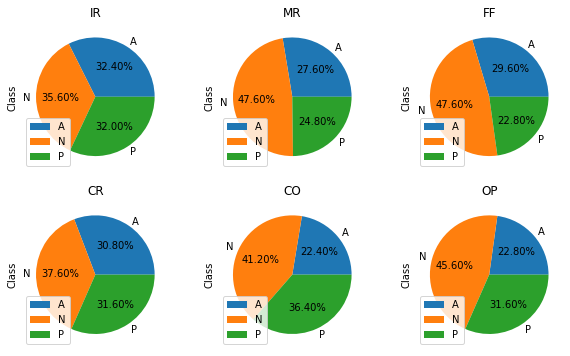

In [13]:
f,ax = plt.subplots(2,3, figsize = (10,6))


dataset[['IR','Class']].groupby('IR').count().plot.pie(subplots = True, autopct = '%.2f%%', ax = ax[0,0])
ax[0,0].legend(loc = 'lower left')
ax[0,0].set_title('IR')

dataset[['MR','Class']].groupby('MR').count().plot.pie(subplots = True, autopct = '%.2f%%', ax = ax[0,1])
ax[0,1].legend(loc = 'lower left')
ax[0,1].set_title('MR')

dataset[['FF','Class']].groupby('FF').count().plot.pie(subplots = True, autopct = '%.2f%%', ax = ax[0,2])
ax[0,2].legend(loc = 'lower left')
ax[0,2].set_title('FF')

dataset[['CR','Class']].groupby('CR').count().plot.pie(subplots = True, autopct = '%.2f%%', ax = ax[1,0])
ax[1,0].legend(loc = 'lower left')
ax[1,0].set_title('CR')

dataset[['CO','Class']].groupby('CO').count().plot.pie(subplots = True, autopct = '%.2f%%', ax = ax[1,1])
ax[1,1].legend(loc = 'lower left')
ax[1,1].set_title('CO')

dataset[['OP','Class']].groupby('OP').count().plot.pie(subplots = True, autopct = '%.2f%%', ax = ax[1,2])
ax[1,2].legend(loc = 'lower left')
ax[1,2].set_title('OP')

plt.show()

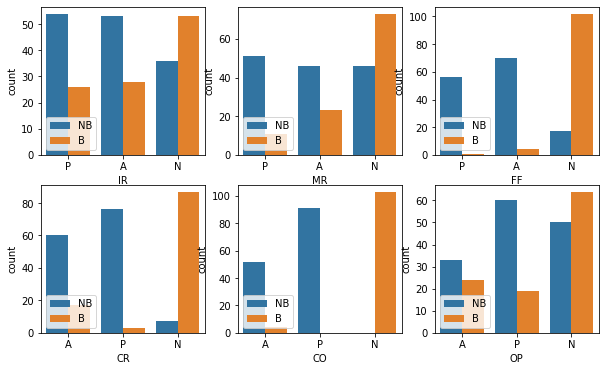

In [14]:
f,ax = plt.subplots(2,3,figsize = (10,6))

sns.countplot(x = 'IR', hue = 'Class', data = dataset, order = dataset['IR'].value_counts().sort_values().index, ax = ax[0,0])
sns.countplot(x = 'MR', hue = 'Class', data = dataset, order = dataset['MR'].value_counts().sort_values().index, ax = ax[0,1])
sns.countplot(x = 'FF', hue = 'Class', data = dataset, order = dataset['FF'].value_counts().sort_values().index, ax = ax[0,2])
sns.countplot(x = 'CR', hue = 'Class', data = dataset, order = dataset['CR'].value_counts().sort_values().index, ax = ax[1,0])
sns.countplot(x = 'CO', hue = 'Class', data = dataset, order = dataset['CO'].value_counts().sort_values().index, ax = ax[1,1])
sns.countplot(x = 'OP', hue = 'Class', data = dataset, order = dataset['OP'].value_counts().sort_values().index, ax = ax[1,2])

ax[0,0].legend(loc = 'lower left')
ax[0,1].legend(loc = 'lower left')
ax[0,2].legend(loc = 'lower left')
ax[1,0].legend(loc = 'lower left')
ax[1,1].legend(loc = 'lower left')
ax[1,2].legend(loc = 'lower left')
plt.show()

In [15]:
#1. There are 4 features who contains the N, negative values more than 40% distribution of feature.
#MR, FF, CO, OP
#2. We can see that IR and CR have the more balance distribution among the features.

#3. CO gets the highest percentage of P, positive values among the features. But the N, negative values is the highest too.

In [16]:
#Convert the P, A, N into numeric string -> numeric

#A:0 , N:1, P:2

from sklearn.preprocessing import LabelEncoder
labelE = LabelEncoder()

dataset['IR'] = labelE.fit_transform(dataset['IR'])
dataset['MR'] = labelE.fit_transform(dataset['MR'])
dataset['FF'] = labelE.fit_transform(dataset['FF'])
dataset['CR'] = labelE.fit_transform(dataset['CR'])
dataset['CO'] = labelE.fit_transform(dataset['CO'])
dataset['OP'] = labelE.fit_transform(dataset['OP'])

dataset['Class'] = labelE.fit_transform(dataset['Class'])

In [17]:
dataset.head()

,id,IR,MR,FF,CR,CO,OP,Class
0,1,2,2,0,0,0,2,1
1,2,1,1,0,0,0,1,1
2,3,0,0,0,0,0,0,1
3,4,2,2,2,2,2,2,1
4,5,1,1,2,2,2,1,1


In [18]:
#Study the feature selection for python
#https://www.datacamp.com/community/tutorials/feature-selection-python

# - Filter Methods
# - Wrapper Methods
# - Embedded Methods


#Apply the weka function from python into the notebook

#Installation the weka library on Ananconda
#https://fracpete.github.io/python-weka-wrapper3/install.html#windows-using-anaconda
    
#Weka on python library 
#https://fracpete.github.io/python-weka-wrapper3/examples.html
#https://weka.sourceforge.io/doc.dev/weka/attributeSelection/AttributeSelection.html
    
#Download the javabridge
#https://www.lfd.uci.edu/~gohlke/pythonlibs/#javabridge

In [19]:
#Attribute Selection

#from weka.attribute_selection import ASSearch, ASEvaluation, AttributeSelection
#search = ASSearch(classname = 'weka.attributeSelection.BestFirst', options = ['-D','1','-N','S'])
#evaluator = ASEvaluation(classname = 'weka.attributeSelection.CfsSubsetEval', options = ['-P','1','-E','1'])
#attsel = AttributeSelection()
#attsel.search(search)
#attsel.evaluator(evaluator)
#attsel.select_attributes(dataset)

During my FYP time, my supervisor told me that go through the feature selection for the data cleaning. 
This practice is good to enhance the performance of model & save the running time for the model. 

But, does it necessary go through the feature selection?
As this is the dataset which contain 7 features only.

Hence, we would like to the compare the accuracy score of the model with different dataset.
One is the original dataset, Another is the dataset go through the feature selection.

#### Original Dataset

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [21]:
df = dataset.copy()
df = df.drop('id', axis = 1)

df_X = df.drop('Class', axis = 1)
df_Y = df['Class']

x_train,x_test,y_train,y_test = train_test_split(df_X,df_Y, test_size = 0.2, random_state = 0)

In [22]:
#1. Naive Bayes

NB = GaussianNB()
NB.fit(x_train, y_train)
NB_y_pred = NB.predict(x_test)

print('Score Method for Training Dataset from ML Class: ', NB.score(x_train,y_train))
print('Score Method for Testing Dataset from ML Class: ', NB.score(x_test,y_test))
NB_accuracy = accuracy_score(y_test,NB_y_pred)
print('Accuracy_Score Class: ', NB_accuracy)


Kfold = KFold(n_splits = 6)
NBScore = cross_val_score(NB,x_train,y_train, cv = Kfold)
NBScore2 = cross_val_score(NB,x_test,y_test, cv = Kfold)


#print('\nK-fold Cross Validation for training dataset: ')
#for i in range(len(NBScore)):
 #   print( i+1 ,NBScore[i])
    
#print('\nK-fold Cross Validation for testing dataset: ')
#for i in range(len(NBScore2)):
 #   print( i+1 ,NBScore2[i])
    
print('\nThe mean score of K-fold Cross Validation for training dataset', np.mean(NBScore))
print('The mean score of K-fold Cross Validation for testing dataset', np.mean(NBScore2))

Score Method for Training Dataset from ML Class:  0.96
Score Method for Testing Dataset from ML Class:  0.98
Accuracy_Score Class:  0.98

The mean score of K-fold Cross Validation for training dataset 0.9598930481283423
The mean score of K-fold Cross Validation for testing dataset 0.9814814814814815


In [23]:
#2. Decision Tree

DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
DT_y_pred = DT.predict(x_test)

print('Score Method for the Training dataset from ML Class:' , DT.score(x_train,y_train))
print('Score Method for the Testing dataset from ML Class:' , DT.score(x_test,y_test))
DT_accuracy = accuracy_score(y_test,DT_y_pred)
print('Accuracy_Score Class: ', DT_accuracy)

DTScore = cross_val_score(DT,x_train,y_train, cv = Kfold)
DTScore2 = cross_val_score(DT,x_test,y_test, cv = Kfold)

print('\nThe mean score of K-fold Cross Validation for training dataset', np.mean(DTScore))
print('The mean score of K-fold Cross Validation for testing dataset', np.mean(DTScore2))

Score Method for the Training dataset from ML Class: 1.0
Score Method for the Testing dataset from ML Class: 1.0
Accuracy_Score Class:  1.0

The mean score of K-fold Cross Validation for training dataset 0.9949494949494949
The mean score of K-fold Cross Validation for testing dataset 0.9606481481481483


In [24]:
#3. K-NN
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
KNN_y_pred = KNN.predict(x_test)

print('Score Method for Training Dataset from ML Class: ', KNN.score(x_train,y_train))
print('Score Method for Testing Dataset from ML Class: ', KNN.score(x_test,y_test))
KNN_accuracy = accuracy_score(y_test, KNN_y_pred)
print('Accuracy_Score Class: ', KNN_accuracy)

KNNScore = cross_val_score(KNN,x_train,y_train,cv = Kfold)
KNNScore2 = cross_val_score(KNN,x_test,y_test,cv = Kfold)

print('\nThe mean score of K-fold Cross Validation for training dataset', np.mean(KNNScore))
print('The mean score of K-fold Cross Validation for testing dataset', np.mean(KNNScore2))

Score Method for Training Dataset from ML Class:  1.0
Score Method for Testing Dataset from ML Class:  1.0
Accuracy_Score Class:  1.0

The mean score of K-fold Cross Validation for training dataset 0.9300356506238859
The mean score of K-fold Cross Validation for testing dataset 0.7569444444444443


**Observation**

First of all, I fit the model from 3 ML Algorithms into the trainig dataset & testing dataset.
It seems like all of the models have the great performance.
Naive Bayes model took **96%** from training dataset, and it had the improved performance in the testing dataset.
Which have **98%** of accuracy score.
At the same time, Decision Tree & KNN model did a great job for both dataset.
Which had the **100%** of accuracy performance.


Secondly, I apply the k-fold cross validation method on these 3 models. And I set the k values to 6.
Because both datasets have the 6 features, the k-value is corresponding to the numbers of the features.
These are the performance of model after the k-fold cross validation.

1. Naive Bayes 96% -> 98%
2. Decision Tree 100% -> 96%
3. KNN 93% -> 75%

We suprised that **Decision Tree & KNN** model have dropped the performance after the k-fold cross-validation.
Especially the KNN model.It took the 100% of accuracy at the first stage.
**we shocked that it took 93% for the training dataset after the k-fold cross-validation.
and it took only 75% of accuracy for the testing dataset.**

But the model based on **Naive Bayes** have the good performance. It remains the performance even apply the k-fold cross-validation method.

**Future Plan**
1. Enhance the KNN-model from the k-fold cross validation method

## Feature Selection

In [25]:
#Check the correlation between the features with the Class Labels
importances = dataset.drop('Class',axis = 1).apply(lambda x: x.corr(dataset['Class']))
index = np.argsort(importances)
print(importances[index])

id   -0.857006
FF   -0.047966
IR    0.015836
MR    0.100632
CR    0.152045
OP    0.159147
CO    0.203521
dtype: float64


In [26]:
df_importance = pd.DataFrame(importances[index])
df_importance = df_importance.reset_index()
df_importance = df_importance.rename(columns = {'index': 'Features', 0: 'Correlations'})
df_importance

,Features,Correlations
0,id,-0.857006
1,FF,-0.047966
2,IR,0.015836
3,MR,0.100632
4,CR,0.152045
5,OP,0.159147
6,CO,0.203521


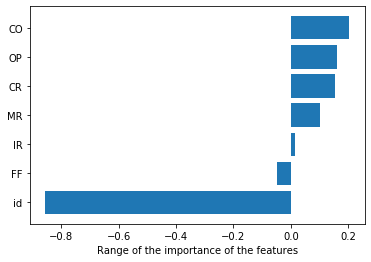

In [27]:
#names = ['id','FF','IR','MR','CR','OP','CO']
plt.barh(df_importance['Features'],df_importance['Correlations'])
plt.xlabel('Range of the importance of the features')
#plt.yticks(range(len(index)), [names[i] for i in index])
plt.show()

In [28]:
#We can see that ID & FF features have the negative correlation with the class labels. 
#Which means that it doesn't contribute much to the modeling

### 1. Filter Methods | Chi-Square Features

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#SelectKBest = select the k highest scoring features
#chi2 = Chi Squared Test
chi_selector = SelectKBest(score_func = chi2, k = 4)
chi_selector.fit(df_X,df_Y)
chi_support = chi_selector.get_support() #Boolean value to show the suitable feature
chi_feature = df.loc[:,chi_support].columns.tolist()
print('1. Filter Methods | Chi Square Features: ', chi_feature)

1. Filter Methods | Chi Square Features:  ['MR', 'CR', 'CO', 'OP']


### 1.1 Filter Methods | Pearson Correlation

In [30]:
corr_list = []
df_columns_name = df_X.columns.tolist()
for i in df_columns_name:
    df_corr = np.corrcoef(df_X[i],df_Y)[0,1]
    corr_list.append(df_corr)
df_pearson = df_X.iloc[:,np.argsort(corr_list)[-4:]].columns.tolist() #np.argsoft" ranking method
print('1.1 Filter Methods |Pearson Correlation: ', df_pearson)

1.1 Filter Methods |Pearson Correlation:  ['MR', 'CR', 'OP', 'CO']


### 2. Wrapper Methods | Step Forward Feature selection

In [31]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


#1. Gaussian NB
sfs_NB = SFS(NB, k_features = 4, forward = True, floating = False, cv = 0)
#DT: classifier
#k_features: the number of features to create the subsets
#forward = True: Forward Feature Selection
#floating: False???
#cv: cross validation fold
sfs_NB.fit(df_X,df_Y)

#2. Decision Tree 
sfs_DT = SFS(DT, k_features = 4, forward = True, floating = False, cv = 0)
sfs_DT.fit(df_X,df_Y)

#3. KNN
sfs_KNN = SFS(KNN, k_features = 4, forward = True, floating = False, cv = 0)
sfs_KNN.fit(df_X,df_Y)

print('1. Sequential Forward Selection | Gaussian Naive Bayes: ',sfs_NB.k_feature_names_)
print('2. Sequential Forward Selection | Decision Tree: ',sfs_DT.k_feature_names_)
print('3. Sequential Forward Selection | KNN', sfs_KNN.k_feature_names_)

#1. Sequential Forward Selection | Gaussian Naive Bayes:  ('IR', 'MR', 'CO', 'OP')
#2. Sequential Forward Selection | Decision Tree:  ('IR', 'FF', 'CR', 'CO')
#3. Sequential Forward Selection | KNN ('IR', 'CR', 'CO', 'OP')

1. Sequential Forward Selection | Gaussian Naive Bayes:  ('IR', 'MR', 'CO', 'OP')
2. Sequential Forward Selection | Decision Tree:  ('IR', 'FF', 'CR', 'CO')
3. Sequential Forward Selection | KNN ('IR', 'CR', 'CO', 'OP')


### 2.1 Wrapper Methods | Backward Elimination

In [32]:
#1. Gaussian Naive Bayes
sfs_NB_BE = SFS(NB, k_features = 4, forward = False, floating = False, cv = 0 )
sfs_NB_BE.fit(df_X,df_Y)

#2. Decision Tree
sfs_DT_BE = SFS(DT, k_features = 4, forward = False, floating = False, cv = 0)
sfs_DT_BE.fit(df_X,df_Y)

#3. KNN
sfs_KNN_BE = SFS(KNN, k_features = 4, forward = False, floating = False, cv = 0)
sfs_KNN_BE.fit(df_X,df_Y)

print('1. Backward Elimination | Gaussian Naive Bayes: ', sfs_NB_BE.k_feature_names_)
print('2, Backward Elimination | Decision Tree: ', sfs_DT_BE.k_feature_names_)
print('3. Backward Elimination | KNN: ', sfs_KNN_BE.k_feature_names_)

1. Backward Elimination | Gaussian Naive Bayes:  ('IR', 'MR', 'FF', 'CO')
2, Backward Elimination | Decision Tree:  ('IR', 'MR', 'FF', 'CO')
3. Backward Elimination | KNN:  ('IR', 'CR', 'CO', 'OP')


### 2.2. Wrapper Methods | Recursive Feature Elimination

In [49]:
from sklearn.feature_selection import RFE

#P/S. RFE Method doesn't support the Gaussian NB, NB class & KNN, KNN Class


#2. Decision Tree Classifier
DT_RFE_selector = RFE(estimator = DT, n_features_to_select = 4)
DT_RFE_selector.fit(df_X,df_Y)
DT_RFE_support = DT_RFE_selector.get_support()
DT_RFE_feature = df.loc[:,DT_RFE_support].columns.tolist()
print('1. Wrapper Methods | RFE | Decision Tree: ', DT_RFE_feature)


1. Wrapper Methods | RFE | Decision Tree:  ['IR', 'CR', 'CO', 'OP']


### 3. Embedded Methods | Lasso 

In [34]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.1)
ls = lasso.fit(df_X,df_Y)
ls

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

**Observation: **

We have 9 methods to build the subset by the feature selection method, and we set 4 features in the subset.
According to the result, we can see that, most of the FE methods select **IR** as the first feature in the subset.
The highest vote for the following features are **CR, CO, OP**.
It's expected to have the result same with the bar graph of importance of features.
Top 3 results of features are qualifed in the subset.
Suprisingly, **IR** is lower than MR in the bar graph, but IR is qualified & be the first feature suggest by FE methods.<br/>

Therefore, we decided to construct the subset [IR,CR,CO,OP] from the dataset.



In [35]:
Dataframe = dataset[['IR','CR','CO','OP','Class']]

df_FE_X = Dataframe.drop('Class',axis = 1)
df_FE_Y = Dataframe['Class']

x_train_FE,x_test_FE,y_train_FE,y_test_FE = train_test_split(df_FE_X,df_FE_Y, test_size = 0.2, random_state = 0)
print('The dimension of Training Dataset: ', x_train_FE.shape)
print('The dimension of Testing Dataset: ', x_test_FE.shape)

The dimension of Training Dataset:  (200, 4)
The dimension of Testing Dataset:  (50, 4)


### Subset

In [41]:
#1. Gaussian NB
NB.fit(x_train_FE,y_train_FE)
NB_FE_y_pred = NB.predict(x_test_FE)

print('Score Method for Training Dataset from ML Class: ', NB.score(x_train_FE,y_train_FE))
print('Score Method for Testing Dataset from ML Class: ', NB.score(x_test_FE,y_test_FE))
NB_FE_accuracy = accuracy_score(y_test_FE,NB_FE_y_pred)
print('Accuracy_Score Class: ', NB_FE_accuracy)

Kfold_FE = KFold(n_splits = 4)
NB_FE_score = cross_val_score(NB,x_train_FE, y_train_FE, cv = Kfold_FE)
NB_FE_score2 = cross_val_score(NB,x_test_FE, y_test_FE, cv = Kfold_FE)

#print('\nK-fold Cross Validation for training dataset')
#for i in range(len(NB_FE_score)):
 #   print(' {}. {}'.format(i+1, NB_FE_score[i]))

#print('\nK-fold Cross Validation for testing dataset')
#for i in range(len(NB_FE_score2)):
 #   print(' {}. {}'.format(i+1, NB_FE_score2[i]))
    

print('\nThe mean score of K-fold Cross Validation for training dataset', np.mean(NB_FE_score))
print('The mean score of K-fold Cross Validation for testing dataset', np.mean(NB_FE_score2))

Score Method for Training Dataset from ML Class:  0.975
Score Method for Testing Dataset from ML Class:  0.96
Accuracy_Score Class:  0.96

The mean score of K-fold Cross Validation for training dataset 0.965
The mean score of K-fold Cross Validation for testing dataset 0.9214743589743589


In [44]:
#2. Decision Tree
DT.fit(x_train_FE,y_train_FE)
DT_FE_y_pred = DT.predict(x_test_FE)

print('Score Method for Training Dataset from ML Class: ', DT.score(x_train_FE,y_train_FE))
print('Score Method for Testing Dataset from ML Class: ', DT.score(x_test_FE,y_test_FE))
DT_FE_accuracy = accuracy_score(y_test_FE,DT_FE_y_pred)
print('Accuracy_Score Class: ', DT_FE_accuracy)

DT_FE_score = cross_val_score(DT,x_train_FE,y_train_FE, cv = Kfold_FE)
DT_FE_score2 = cross_val_score(DT,x_test_FE,y_test_FE, cv = Kfold_FE)

print('\nThe mean score of K-fold Cross Validation for training dataset', np.mean(DT_FE_score))
print('The mean score of K-fold Cross Validation for testing dataset', np.mean(DT_FE_score2))

Score Method for Training Dataset from ML Class:  1.0
Score Method for Testing Dataset from ML Class:  1.0
Accuracy_Score Class:  1.0

The mean score of K-fold Cross Validation for training dataset 1.0
The mean score of K-fold Cross Validation for testing dataset 0.9599358974358975


In [48]:
#3. KNN 
KNN.fit(x_train_FE,y_train_FE)
KNN_FE_y_pred = KNN.predict(x_test_FE)

print('Score Method for Training Dataset from ML Class: ', KNN.score(x_train_FE,y_train_FE))
print('Score Method for Testing Dataset from ML Class: ', KNN.score(x_train_FE,y_train_FE))
KNN_FE_accuracy = accuracy_score(y_test_FE, KNN_FE_y_pred)
print('Accuracy_Score Class: ', KNN_FE_accuracy)

KNN_FE_score = cross_val_score(KNN,x_train_FE,y_train_FE, cv = Kfold_FE)
KNN_FE_score2 = cross_val_score(KNN, x_test_FE, y_test_FE, cv = Kfold_FE)

print('\nThe mean score of K-fold Cross Validation for training dataset', np.mean(KNN_FE_score))
print('The mean score of K-fold Cross Validation for testing dataset', np.mean(KNN_FE_score2))

Score Method for Training Dataset from ML Class:  1.0
Score Method for Testing Dataset from ML Class:  1.0
Accuracy_Score Class:  1.0

The mean score of K-fold Cross Validation for training dataset 0.945
The mean score of K-fold Cross Validation for testing dataset 0.7355769230769231


In [37]:
#17.2.2020

#1. Write the observation about the performance of model fit into the subset from FE.
#2. Create the dataframe to intepret the performance of model to contrast the Original dataset & subset